In [12]:
pip install kagglehub


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpreda/covid-world-vaccination-progress")

print("Path to dataset files:", path)

Path to dataset files: /Users/patrickfilima/.cache/kagglehub/datasets/gpreda/covid-world-vaccination-progress/versions/249


In [14]:
import os

dataset_path = "/Users/patrickfilima/.cache/kagglehub/datasets/gpreda/covid-world-vaccination-progress/versions/249"

os.listdir(dataset_path)


['country_vaccinations.csv', 'country_vaccinations_by_manufacturer.csv']

In [15]:
import pandas as pd

file_path = os.path.join(dataset_path, "country_vaccinations.csv")
df = pd.read_csv(file_path)

df.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [17]:
df = pd.read_csv(path + "/country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [18]:
df.shape

(86512, 15)

In [20]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  str    
 1   iso_code                             86512 non-null  str    
 2   date                                 86512 non-null  str    
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_million       86

In [24]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='str')

In [28]:
df.describe

<bound method NDFrame.describe of            country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
86507     Zimbabwe      ZWE  2022-03-25           8691642.0   
86508     Zimbabwe      ZWE  2022-03-26           8791728.0   
86509     Zimbabwe      ZWE  2022-03-27           8845039.0   
86510     Zimbabwe      ZWE  2022-03-28           8934360.0   
86511     Zimbabwe      ZWE  2022-03-29           9039729.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN      

Clean the dataset (minimal but essential)

In [29]:
df["date"] = pd.to_datetime(df["date"])

In [32]:
df.isna().sum().sort_values(ascending=False)


daily_vaccinations_raw                 51150
people_fully_vaccinated                47710
people_fully_vaccinated_per_hundred    47710
people_vaccinated                      45218
people_vaccinated_per_hundred          45218
total_vaccinations                     42905
total_vaccinations_per_hundred         42905
daily_vaccinations                       299
daily_vaccinations_per_million           299
country                                    0
iso_code                                   0
date                                       0
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

# Analysis Question: How did COVID-19 vaccination progress differ across countries over time?

### Top 10 countries by total vaccinations (latest date)

In [33]:
latest = df.sort_values("date").groupby("country").tail(1)

top10 = latest.sort_values("total_vaccinations", ascending=False).head(10)

top10[["country", "total_vaccinations"]]


,country,total_vaccinations
16225,China,3.263129e+09
35810,India,1.834501e+09
82830,United States,5.601818e+08
11085,Brazil,4.135596e+08
36252,Indonesia,3.771089e+08
39660,Japan,2.543456e+08
6560,Bangladesh,2.436427e+08
59850,Pakistan,2.193686e+08
84630,Vietnam,2.031444e+08
50347,Mexico,1.919079e+08


## First visualization

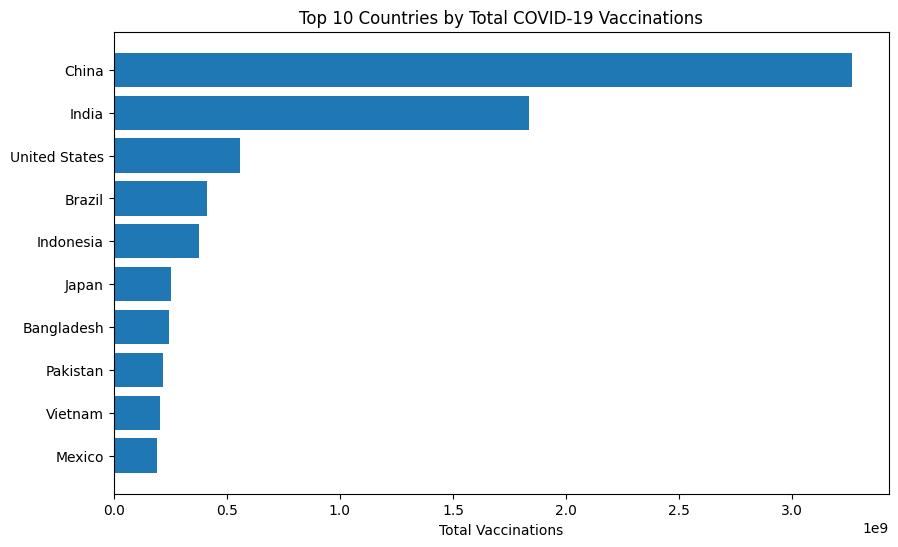

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top10["country"], top10["total_vaccinations"])
plt.xlabel("Total Vaccinations")
plt.title("Top 10 Countries by Total COVID-19 Vaccinations")
plt.gca().invert_yaxis()
plt.show()
